In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfx = pd.read_csv("./Diabetes_XTrain.csv")
dfy = pd.read_csv("./Diabetes_YTrain.csv")

print(dfx.shape, dfy.shape)
print(dfx.columns, dfy.columns)
print(dfx.head(5), dfy.head(5))

(576, 8) (576, 1)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') Index(['Outcome'], dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23      Outcome
0        1
1        0
2        1
3        1
4        0


In [21]:
X_train = dfx.values
Y_train = dfy.values
print(X_train.shape, Y_train.shape)

(576, 8) (576, 1)


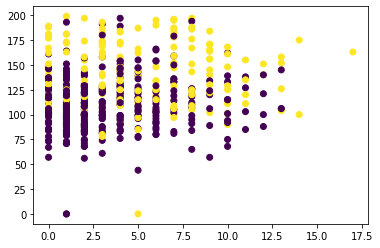

In [28]:
plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train)
plt.show()

In [33]:
def dist(x1, x2):
    return np.sqrt(sum((x1- x2)**2))

def knn(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    #nearest k points
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:, 1], return_counts=True)

    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [34]:
df = pd.read_csv("./Diabetes_Xtest.csv")
X_test = df.values
print(X_test.shape)

(192, 8)


In [43]:
m = X_test.shape[0]
output = []
for i in range(m):
    pred = knn(X_train, Y_train, X_test[i])
    output.append(int(pred[0]))
print(len(output))
output[2]

192


0

In [49]:
output = np.array(output, dtype=int)
print(output.shape)
np.savetxt("./output_diabetes.csv", output, fmt='%d')

(192, 1)
